Ex04: In this exercise you will use the dataset in EFIplus_medit.zip to:
1. Using an appropriate visualization, check the effect of *Mean Annual Temperature* (Temp_ann) on the
presence of *Salmo trutta fario* (Brown Trout).

2. Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
normal distribution.
3. Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution

In [13]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

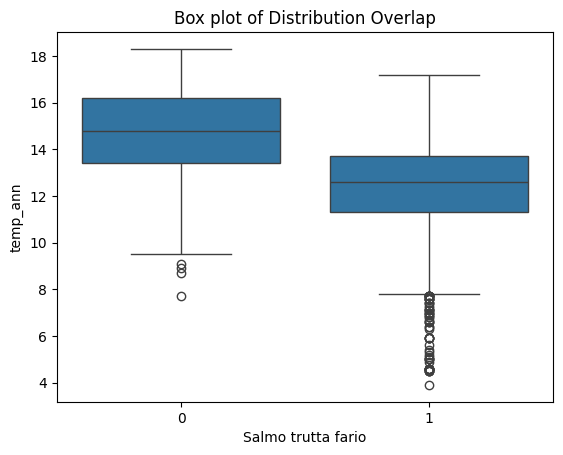

In [14]:
#1
#boxplot to visualize quantitative against categorical to understand overlap among distributinos
sns.boxplot(x="Salmo trutta fario", y="temp_ann", data=df).set_title("Box plot of Distribution Overlap")
plt.show()

In [15]:
#won't use, but was curious to see how it would work
#ctab = pd.crosstab(df['temp_ann'], df['Salmo trutta fario'])
# Creating barplot from crosstable
#barplot = ctab.plot.bar(rot=0)

2:
Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a
normal distribution.
- make a qq plot over the actual_river_slop to visualize the distribution
- run a normality test


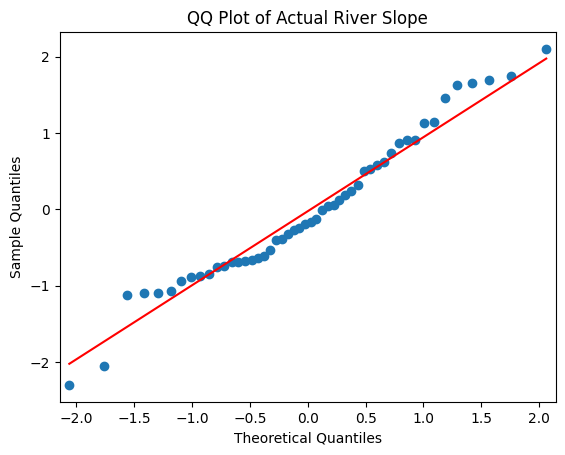

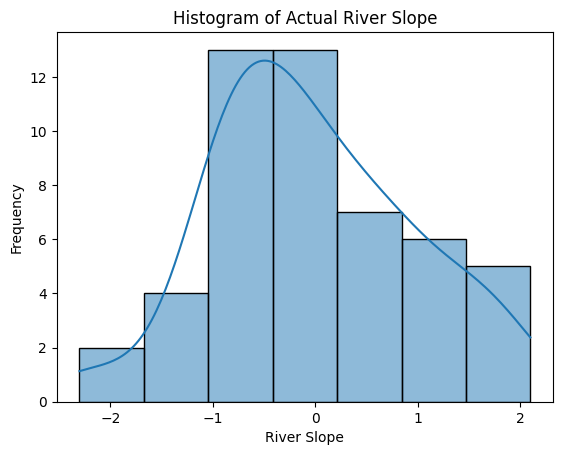

Statistics=0.970, p=0.242
Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


In [16]:
#2
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting

# Assuming 'actual_rive_slope' is your actual river slope data

# seed the random number generator
seed(1)

# generate univariate observations (replace this with your actual river slope data)
data = randn(50)  # Example data (replace with your actual river slope data)

# Create QQ plot
qqplot(data, line='s')  # 's' for standardized line
plt.title('QQ Plot of Actual River Slope')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Histogram (optional for additional visualization)
sns.histplot(data, kde=True)
plt.title('Histogram of Actual River Slope')
plt.xlabel('River Slope')
plt.ylabel('Frequency')
plt.show()

#Normality Test
# import function
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian (reject H0 with an error probability <0.05)')


3. Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution

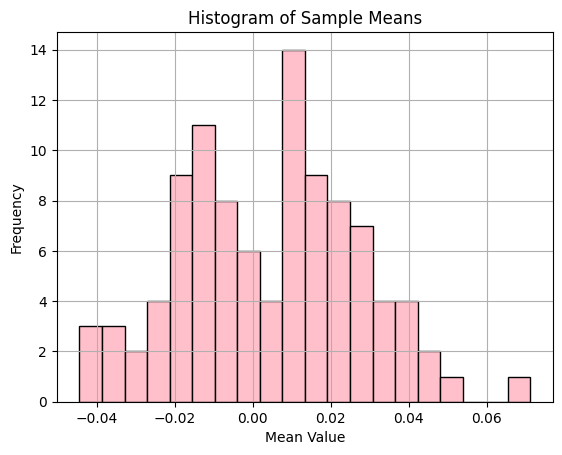

Statistics=0.989, p=0.623
Sample means are likely drawn from a normal distribution. Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Generate 100 samples of 2000 observations each
sample_size = 2000
num_samples = 100
data = np.random.randn(sample_size, num_samples)

# Calculate mean for each sample
sample_means = np.mean(data, axis=0)

# Plot histogram of sample means
plt.hist(sample_means, bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Sample Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# normality test
stat, p = shapiro(sample_means)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs with 3 decimal places
# interpret. H0: 'the sample was drawn from a Gaussian distribution'.
alpha = 0.05
if p > alpha:
 print('Sample means are likely drawn from a normal distribution. Sample is not significantly different from Gaussian (fail to reject H0. Rejecting H0 has an error probability >0.05)')
else:
 print('Sample is significantly different from Gaussian, they are not likely drawn from a normal distribution (reject H0 with an error probability <0.05)')
